## id:6-6-6

In [72]:
# imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import statistics

## Answer a) i)

In [73]:
data = pd.read_csv("week2.csv")
data.reset_index(inplace=True)
data.columns = ['X1', 'X2', 'y']
data.head()

,X1,X2,y
0,-0.56,0.99,1
1,0.44,0.44,1
2,-0.23,-0.43,-1
3,-0.14,0.18,1
4,0.55,-0.13,1


In [74]:
df = data.copy()
df.head()

,X1,X2,y
0,-0.56,0.99,1
1,0.44,0.44,1
2,-0.23,-0.43,-1
3,-0.14,0.18,1
4,0.55,-0.13,1


In [75]:
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

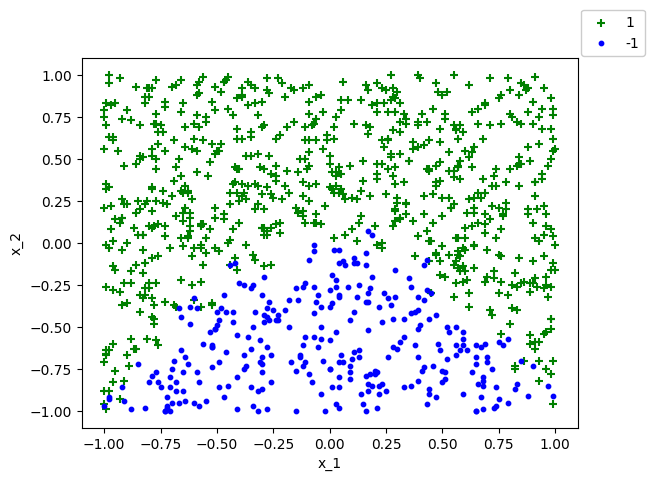

In [76]:
plt.scatter(X1[y==1], X2[y==1], c='g', marker = '+', label='1')
plt.scatter(X1[y==-1], X2[y==-1], c='b', marker = 'o', label='-1', s=10)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(bbox_to_anchor=(1.15,1.15), loc='upper right', fancybox=True, framealpha=1, fontsize=10)
# plt.show()
plt.savefig('Figure_1.png')

## Answer a) ii)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=4)
print('Train Set: ', x_train.shape, y_train.shape)
print('Test Set: ', x_test.shape, y_test.shape)

Train Set:  (799, 2) (799,)
Test Set:  (200, 2) (200,)


The slopes are:  [-0.25638908  4.80424731]
The intercept is:  [1.81954024]
The score is:  0.8723404255319149
Feature: 0, Score: -0.25639
Feature: 1, Score: 4.80425


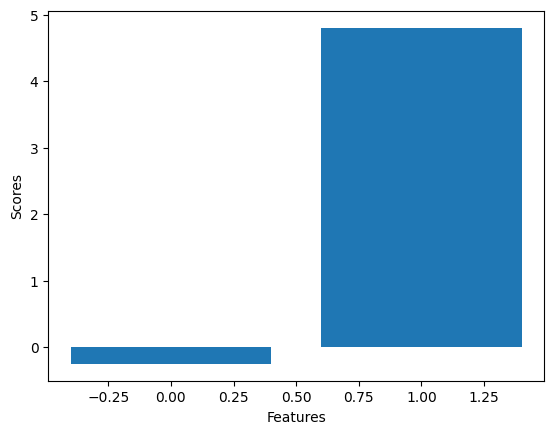

In [78]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
print('The slopes are: ',LR.coef_[0])
print('The intercept is: ',LR.intercept_)
predictions = LR.predict(x_train)
score = LR.score(x_train, y_train)
print('The score is: ',score)

# FEATURE IMPORTANCE:
feature_importance = LR.coef_[0]
for i,val in enumerate(feature_importance):
	print('Feature: %0d, Score: %.5f' % (i,val))
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.xlabel('Features')
plt.ylabel('Scores')
# plt.show()
plt.savefig('Figure_2.png')

In [79]:
cm = metrics.confusion_matrix(y_train, predictions)
print(cm)

# Report
cr = metrics.classification_report(y_train, predictions)
print(cr)

[[186  58]
 [ 44 511]]
              precision    recall  f1-score   support

          -1       0.81      0.76      0.78       244
           1       0.90      0.92      0.91       555

    accuracy                           0.87       799
   macro avg       0.85      0.84      0.85       799
weighted avg       0.87      0.87      0.87       799



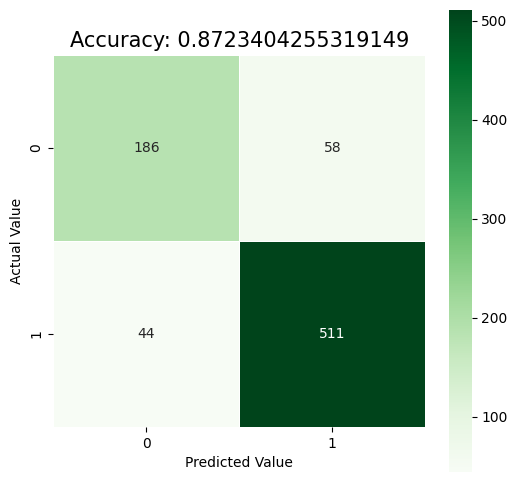

In [80]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual Value');
plt.xlabel('Predicted Value');
all_sample_title = 'Accuracy: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('Figure_4.png')

## Answer a) iii)

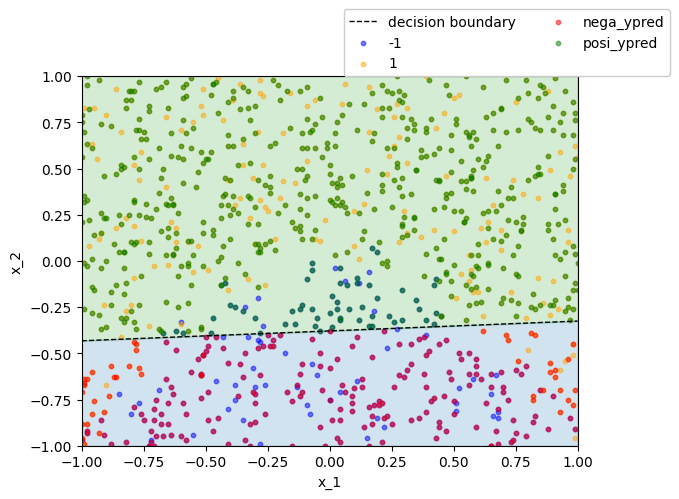

In [81]:
b_ = LR.intercept_[0]
w1, w2 = LR.coef_.T
c_ = -b_/w2
m_ = -w1/w2
x_min, x_max = -1, 1
y_min, y_max = -1, 1
x_d = np.array([x_min, x_max])
y_d = m_*x_d + c_
plt.plot(x_d, y_d, 'k', lw=1, ls='--',label='decision boundary')
plt.fill_between(x_d, y_d, y_min, color='tab:blue', alpha=0.2)
plt.fill_between(x_d, y_d, y_max, color='tab:green', alpha=0.2)
plt.scatter(*X[y==-1].T, s=10, alpha=0.5,label='-1',c='blue')
plt.scatter(*X[y==1].T, s=10, alpha=0.5,label='1',c='orange')
plt.scatter(*x_train[predictions==-1].T, s=10, alpha=0.5, label='nega_ypred',c='red')
plt.scatter(*x_train[predictions==1].T, s=10, alpha=0.5,label='posi_ypred',c='green')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.ylabel('x_2')
plt.xlabel('x_1')
plt.legend(bbox_to_anchor=(1.2,1.2), loc='upper right', fancybox=True, framealpha=1,fontsize=10,ncol=2)
plt.savefig('Figure_3.png')

## Answer a) iv)

## Answer b) i)

In [82]:
lsvc001 = LinearSVC(C=0.001)
print(lsvc001)
lsvc001.fit(x_train, y_train)
score = lsvc001.score(x_train, y_train)
print("Score: ", score)
cv_scores = cross_val_score(lsvc001, x_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())
print('The coefficients are: ',lsvc001.coef_[0])
print('The intercept is: ',lsvc001.intercept_)

LinearSVC(C=0.001)
Score:  0.8360450563204005
CV average score: 0.83
The coefficients are:  [-0.01145003  0.39979639]
The intercept is:  [0.23620548]


In [83]:
lsvc1 = LinearSVC(C=1)
print(lsvc1)
lsvc1.fit(x_train, y_train)
score = lsvc1.score(x_train, y_train)
print("Score: ", score)
cv_scores = cross_val_score(lsvc1, x_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())
print('The coefficients are: ',lsvc1.coef_[0])
print('The intercept is: ',lsvc1.intercept_)

LinearSVC(C=1)
Score:  0.8735919899874843
CV average score: 0.87
The coefficients are:  [-0.09123656  1.77077577]
The intercept is:  [0.64844107]


In [84]:
lsvc100 = LinearSVC(C=100,dual=False)
print(lsvc100)
lsvc100.fit(x_train, y_train)
score = lsvc100.score(x_train, y_train)
print("Score: ", score)
cv_scores = cross_val_score(lsvc100, x_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())
print('The coefficients are: ',lsvc100.coef_[0])
print('The intercept is: ',lsvc100.intercept_)

LinearSVC(C=100, dual=False)
Score:  0.8735919899874843
CV average score: 0.87
The coefficients are:  [-0.09287349  1.79129874]
The intercept is:  [0.65660689]


## Answer b) ii)

[[140 104]
 [ 27 528]]
              precision    recall  f1-score   support

          -1       0.84      0.57      0.68       244
           1       0.84      0.95      0.89       555

    accuracy                           0.84       799
   macro avg       0.84      0.76      0.79       799
weighted avg       0.84      0.84      0.83       799



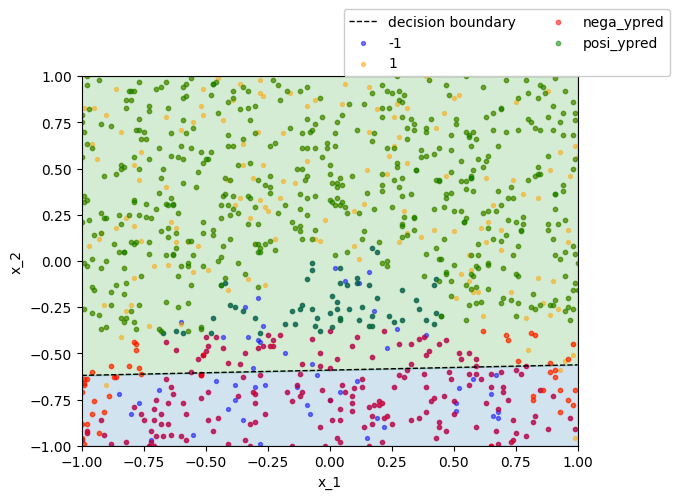

In [85]:
ypred001 = lsvc001.predict(x_train)
cm001 = confusion_matrix(y_train, ypred001)
print(cm001)
cr001 = metrics.classification_report(y_train, ypred001)
print(cr001)
bb = lsvc001.intercept_[0]
w1, w2 = lsvc001.coef_.T
cb = -bb/w2
mb = -w1/w2
xmin_b, xmax_b = -1, 1
ymin_b, ymax_b = -1, 1
xd_b = np.array([xmin_b, xmax_b])
yd_b = mb*xd_b + cb
plt.plot(xd_b, yd_b, 'k', lw=1, ls='--', label='decision boundary')
plt.fill_between(xd_b, yd_b, ymin_b, color='tab:blue', alpha=0.2)
plt.fill_between(xd_b, yd_b, ymax_b, color='tab:green', alpha=0.2)
plt.scatter(*X[y==-1].T, s=8, alpha=0.5,c='blue',label='-1')
plt.scatter(*X[y==1].T, s=8, alpha=0.5,c='orange',label='1')
plt.scatter(*x_train[predictions==-1].T, s=10, alpha=0.5, label='nega_ypred',c='red')
plt.scatter(*x_train[predictions==1].T, s=10, alpha=0.5,label='posi_ypred',c='green')
plt.xlim(xmin_b, xmax_b)
plt.ylim(ymin_b, ymax_b)
plt.ylabel('x_2')
plt.xlabel('x_1')
plt.legend(bbox_to_anchor=(1.2,1.2), loc='upper right', fancybox=True, framealpha=1,fontsize=10,ncol=2)
plt.savefig('Figure_5_001')

[[188  56]
 [ 45 510]]
              precision    recall  f1-score   support

          -1       0.81      0.77      0.79       244
           1       0.90      0.92      0.91       555

    accuracy                           0.87       799
   macro avg       0.85      0.84      0.85       799
weighted avg       0.87      0.87      0.87       799



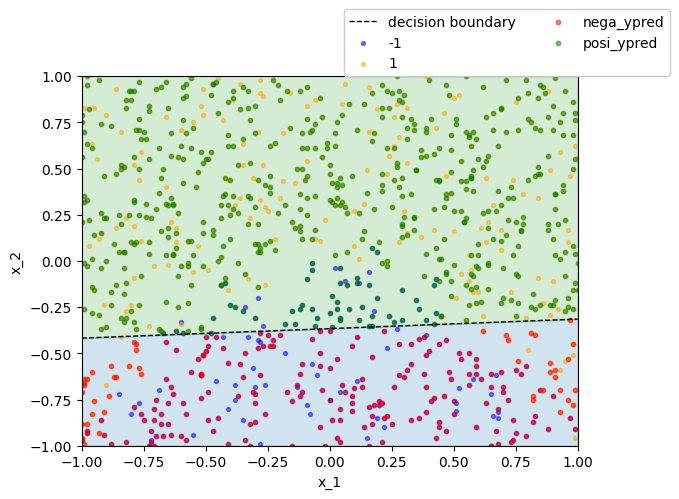

In [86]:
ypred1 = lsvc1.predict(x_train)
cm1 = confusion_matrix(y_train, ypred1)
print(cm1)
cr1 = metrics.classification_report(y_train, ypred1)
print(cr1)
bb2 = lsvc1.intercept_[0]
w1, w2 = lsvc1.coef_.T
c_bb2 = -bb2/w2
m_bb2 = -w1/w2
xmin_bb2, xmax_bb2 = -1, 1
ymin_bb2, ymax_bb2 = -1, 1
xd_bb2 = np.array([xmin_bb2, xmax_bb2])
yd_bb2 = m_bb2*xd_bb2 + c_bb2
plt.plot(xd_bb2, yd_bb2, 'k', lw=1, ls='--',label='decision boundary')
plt.fill_between(xd_bb2, yd_bb2, ymin_bb2, color='tab:blue', alpha=0.2)
plt.fill_between(xd_bb2, yd_bb2, ymax_bb2, color='tab:green', alpha=0.2)
plt.scatter(*X[y==-1].T, s=8, alpha=0.5,c='blue',label='-1')
plt.scatter(*X[y==1].T, s=8, alpha=0.5,c='orange',label='1')
plt.scatter(*x_train[ypred1==-1].T, s=10, alpha=0.5, label='nega_ypred',c='red')
plt.scatter(*x_train[ypred1==1].T, s=10, alpha=0.5,label='posi_ypred',c='green')
plt.xlim(xmin_bb2, xmax_bb2)
plt.ylim(ymin_bb2, ymax_bb2)
plt.ylabel('x_2')
plt.xlabel('x_1')
plt.legend(bbox_to_anchor=(1.2,1.2), loc='upper right', fancybox=True, framealpha=1,fontsize=10,ncol=2)
plt.savefig('Figure_5_1.png')

[[188  56]
 [ 45 510]]
              precision    recall  f1-score   support

          -1       0.81      0.77      0.79       244
           1       0.90      0.92      0.91       555

    accuracy                           0.87       799
   macro avg       0.85      0.84      0.85       799
weighted avg       0.87      0.87      0.87       799



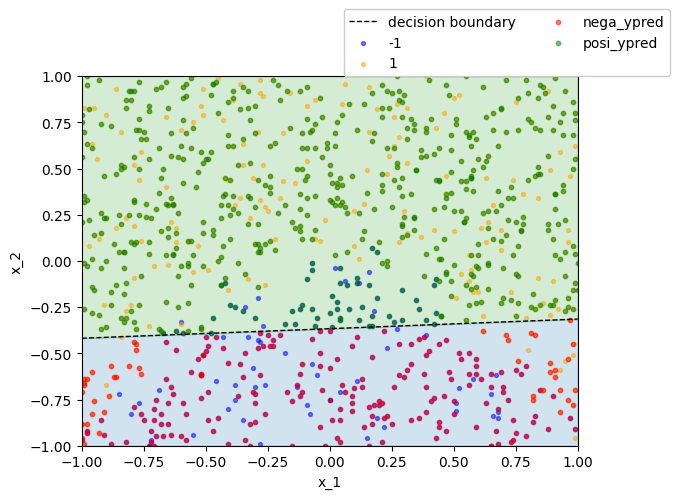

In [87]:
ypred100 = lsvc100.predict(x_train)
cm100 = confusion_matrix(y_train, ypred100)
print(cm100)
cr100 = metrics.classification_report(y_train, ypred100)
print(cr100)
bb3 = lsvc100.intercept_[0]
w1, w2 = lsvc100.coef_.T
c_b3 = -bb3/w2
m_b3 = -w1/w2
xmin_b3, xmax_b3 = -1, 1
ymin_b3, ymax_b3 = -1, 1
xd_b3 = np.array([xmin_b3, xmax_b3])
yd_b3 = m_b3*xd_b3 + c_b3
plt.plot(xd_b3, yd_b3, 'k', lw=1, ls='--',label='decision boundary')
plt.fill_between(xd_b3, yd_b3, ymin_b3, color='tab:blue', alpha=0.2)
plt.fill_between(xd_b3, yd_b3, ymax_b3, color='tab:green', alpha=0.2)
plt.scatter(*X[y==-1].T, s=8, alpha=0.5,c='blue',label='-1')
plt.scatter(*X[y==1].T, s=8, alpha=0.5,c='orange',label='1')
plt.scatter(*x_train[ypred100==-1].T, s=10, alpha=0.5, label='nega_ypred',c='red')
plt.scatter(*x_train[ypred100==1].T, s=10, alpha=0.5,label='posi_ypred',c='green')
plt.xlim(xmin_b3, xmax_b3)
plt.ylim(ymin_b3, ymax_b3)
plt.ylabel('x_2')
plt.xlabel('x_1')
plt.legend(bbox_to_anchor=(1.2,1.2), loc='upper right', fancybox=True, framealpha=1,fontsize=10,ncol=2)
plt.savefig('Figure_5_100.png')

## Answer b) iii)

## Answer b) iv)

## Answer c) i)

In [88]:
# Adding two new columns to the dataframe
df1=df.copy()
df1['X1**2']=df1['X1']**2
df1['X2**2']=df1['X2']**2
df1.head()

,X1,X2,y,X1**2,X2**2
0,-0.56,0.99,1,0.3136,0.9801
1,0.44,0.44,1,0.1936,0.1936
2,-0.23,-0.43,-1,0.0529,0.1849
3,-0.14,0.18,1,0.0196,0.0324
4,0.55,-0.13,1,0.3025,0.0169


In [89]:
X_1=np.column_stack((X1,X2,X1**2,X2**2))
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_1,y, test_size=0.2,random_state=4)
print('Train Set: ',x_train1.shape, y_train1.shape)
print('Test Set: ',x_test1.shape, y_test1.shape)

Train Set:  (799, 4) (799,)
Test Set:  (200, 4) (200,)


In [90]:
LR1=LogisticRegression()
LR1.fit(x_train1, y_train1)
print('The Slopes are: ',LR1.coef_[0])
print('The intercept is: ',LR1.intercept_)
predictions1 = LR1.predict(x_train1)
score1 = LR1.score(x_train1, y_train1)
print('The score is: ',score1)

The Slopes are:  [-0.22742594  6.32595126  6.05620586 -0.88229379]
The intercept is:  [0.44446801]
The score is:  0.9662077596996246


In [91]:
# Confusion matrix
cmc = metrics.confusion_matrix(y_train1, predictions1)
print(cmc)

# Accuracy
crc = metrics.classification_report(y_train1, predictions1)
print(crc)

[[229  15]
 [ 12 543]]
              precision    recall  f1-score   support

          -1       0.95      0.94      0.94       244
           1       0.97      0.98      0.98       555

    accuracy                           0.97       799
   macro avg       0.96      0.96      0.96       799
weighted avg       0.97      0.97      0.97       799



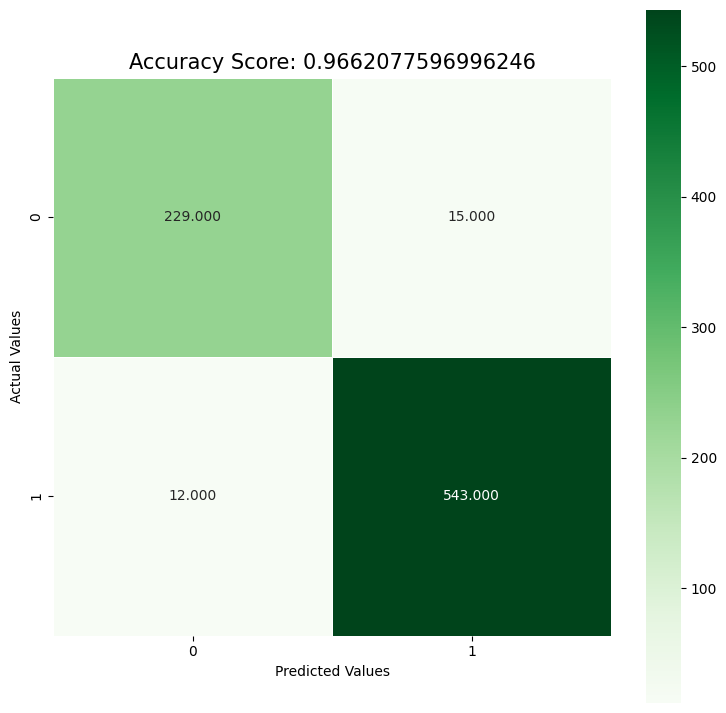

In [92]:
plt.figure(figsize=(9,9))
sns.heatmap(cmc, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual Values');
plt.xlabel('Predicted Values');
all_sample_title = 'Accuracy Score: {0}'.format(score1)
plt.title(all_sample_title, size = 15);
plt.savefig('Figure_6.png')

## Answer c) ii)

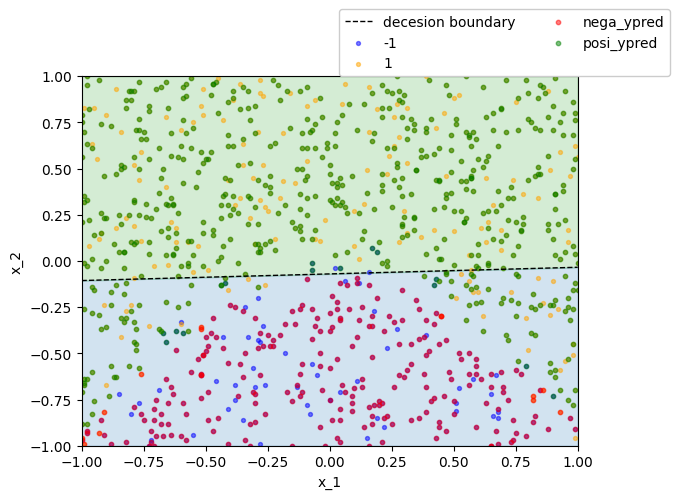

In [101]:
XX=np.column_stack((X1**2,X2**2))
bxx = LR1.intercept_[0]
w=w1, w2, w3, w4 = LR1.coef_.T
c_c = -bxx/w2
m_c = -w1/w2
xmin_c, xmax_c = -1, 1
ymin_c, ymax_c = -1, 1
xd_c = np.array([xmin_c, xmax_c])
yd_c = m_c*xd_c + c_c
plt.plot(xd_c, yd_c, 'k', lw=1, ls='--', label='decesion boundary')
plt.fill_between(xd_c, yd_c, ymin_c, color='tab:blue', alpha=0.2)
plt.fill_between(xd_c, yd_c, ymax_c, color='tab:green', alpha=0.2)
plt.scatter(*X[y==-1].T, s=8, alpha=0.5,c='blue',label='-1')
plt.scatter(*X[y==1].T, s=8, alpha=0.5,c='orange',label='1')
plt.scatter(*x_train[predictions1==-1].T, s=10, alpha=0.5, label='nega_ypred',c='red')
plt.scatter(*x_train[predictions1==1].T, s=10, alpha=0.5,label='posi_ypred',c='green')
plt.xlim(xmin_c, xmax_c)
plt.ylim(ymin_c, ymax_c)
plt.ylabel('x_2')
plt.xlabel('x_1')
plt.legend(bbox_to_anchor=(1.2,1.2), loc='upper right', fancybox=True, framealpha=1,fontsize=10,ncol=2)
plt.savefig('Figure_7.png')

## Answer c) iii)

base model accuracy score:  0.7027027027027027  - trained model accuracy score:  0.9662077596996246


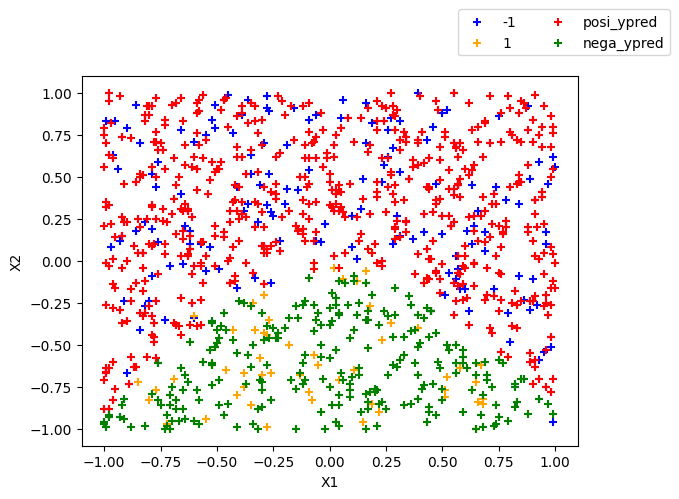

In [100]:
baseline_model = np.sign(statistics.mean(y))
ypred_baseline = np.full((len(y), 1), baseline_model)
LR_accuracy = metrics.accuracy_score(y_train1, predictions1)
baseline_accuracy = metrics.accuracy_score(y, ypred_baseline)
print("base model accuracy score: ", baseline_accuracy," - trained model accuracy score: ", LR_accuracy)
plt.scatter(X1[y==1], X2[y==1],color='blue', marker="+",label='-1')
plt.scatter(X1[y==-1], X2[y==-1],color='orange', marker="+",label='1')
plt.scatter(*x_train[predictions1==1].T,color='red', marker="+",label='posi_ypred')
plt.scatter(*x_train[predictions1==-1].T,color='green', marker="+",label='nega_ypred')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(bbox_to_anchor=(1.2,1.2),loc='upper right',ncol=2,fontsize=10)
plt.savefig('Figure_8.png')

## Answer c) iv)

In [95]:
w

array([[-0.22742594],
       [ 6.32595126],
       [ 6.05620586],
       [-0.88229379]])

In [96]:
def boundary(x1):
  # returns x2 on the boundary for a given x1
  # we solve square equation
  # a x^2 + b x + c = 0 
  # --> x = (-b +- sqrt(b^2 - 4ac)) / 2a
  a_ = w4
  b_ = w2 + w3 * x1
  c_ = b + w1*x1 + w1*x1**2
  tmp = b_**2 - 4*a_*c_
  if tmp < 0:
    return None
  ans = [(-b_ + tmp**0.5) / (2*a_), (-b_ - tmp**0.5) / (2*a_)]
  ans.sort()  # smaller first
  return ans

In [97]:
# compute the boundaries
xs = np.linspace(X1.min(), X2.max())
ys_1 = []
ys_2 = []
for x1 in xs:
  tmp = boundary(x1)
  if tmp is None:
    ys_1.append(None)
    ys_2.append(None)
  else:
    ys_1.append(tmp[0])  # smaller boundary
    ys_2.append(tmp[1])  # larger boundary

NameError: name 'b' is not defined

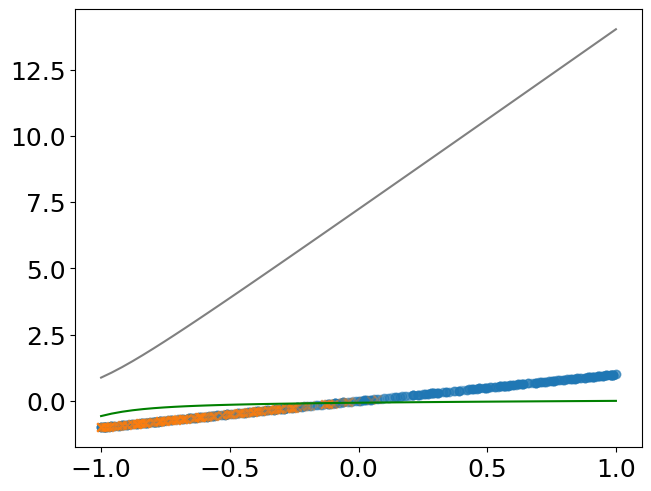

In [ ]:
# flg = (Y > 0)
plt.scatter(X1[y==1], X1[y==1], alpha=0.3, marker="o")
plt.scatter(X2[y==-1], X2[y==-1], alpha=0.3, marker="x")

plt.plot(xs, ys_1, c="green")
plt.plot(xs, ys_2, c="gray")

# if ys contains None, need to skip them
# plt.fill_between(xs, ys_1, ys_2, color='tab:blue', alpha=0.2)
# plt.fill_between(xs, min(ys_1), ys_1, color='tab:orange', alpha=0.2)
# plt.fill_between(xs, ys_2, max(ys_2), color='tab:orange', alpha=0.2)